In [3]:
from datasets import load_dataset, concatenate_datasets
from PIL import Image
import os
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import io
import base64
import cv2
import json

In [6]:
df = pd.read_parquet("/mnt/AI_NAS/datalake/catalog/provider=huggingface/dataset=invoice_kie/task=kie/variant=kie_struct/lang=en/src=real/data.parquet")

In [22]:
df[df.duplicated(subset=["image_path"])]

,image_path,width,height,label,date
88,/mnt/AI_NAS/datalake/catalog/provider=huggingf...,1448,2048,"{""invoice_no"": ""11640046"", ""date_of_issue"": ""1...",2025-05-27
170,/mnt/AI_NAS/datalake/catalog/provider=huggingf...,1582,2048,"{""invoice_number"": ""692367"", ""invoice_date"": ""...",2025-05-27
190,/mnt/AI_NAS/datalake/catalog/provider=huggingf...,1448,2048,"{""invoice_no"": ""27237177"", ""date_of_issue"": ""0...",2025-05-27
196,/mnt/AI_NAS/datalake/catalog/provider=huggingf...,1448,2048,"{""invoice_no"": ""35989405"", ""date_of_issue"": ""0...",2025-05-27
237,/mnt/AI_NAS/datalake/catalog/provider=huggingf...,1447,2048,"{""invoice_number"": ""816169"", ""date_of_issue"": ...",2025-05-27
...,...,...,...,...,...
5244,/mnt/AI_NAS/datalake/catalog/provider=huggingf...,2048,1582,"{""items"": [{""amount"": 4175.7, ""date"": ""2023-06...",2025-05-27
5245,/mnt/AI_NAS/datalake/catalog/provider=huggingf...,2048,1582,"{""items"": [], ""total"": 215007.17}",2025-05-27
5246,/mnt/AI_NAS/datalake/catalog/provider=huggingf...,1582,2048,"{""items"": [{""amount"": 573.41, ""date"": ""2023-07...",2025-05-27
5247,/mnt/AI_NAS/datalake/catalog/provider=huggingf...,2048,1582,"{""items"": [{""amount"": 5872.5, ""date"": ""2022-05...",2025-05-27


In [25]:
df[df.duplicated(subset=["label"])]

,image_path,width,height,label,date
380,/mnt/AI_NAS/datalake/catalog/provider=huggingf...,1448,2048,"{""invoice_no"": ""76619276"", ""date_of_issue"": ""1...",2025-05-27
415,/mnt/AI_NAS/datalake/catalog/provider=huggingf...,1448,2048,"{""invoice_no"": ""47703225"", ""date_of_issue"": ""0...",2025-05-27
728,/mnt/AI_NAS/datalake/catalog/provider=huggingf...,1448,2048,"{""invoice_no"": ""70710512"", ""date_of_issue"": ""0...",2025-05-27
859,/mnt/AI_NAS/datalake/catalog/provider=huggingf...,1448,2048,"{""invoice_no"": ""59906252"", ""date_of_issue"": ""0...",2025-05-27
944,/mnt/AI_NAS/datalake/catalog/provider=huggingf...,1448,2048,"{""invoice_no"": ""72492750"", ""date_of_issue"": ""0...",2025-05-27
...,...,...,...,...,...
5244,/mnt/AI_NAS/datalake/catalog/provider=huggingf...,2048,1582,"{""items"": [{""amount"": 4175.7, ""date"": ""2023-06...",2025-05-27
5245,/mnt/AI_NAS/datalake/catalog/provider=huggingf...,2048,1582,"{""items"": [], ""total"": 215007.17}",2025-05-27
5246,/mnt/AI_NAS/datalake/catalog/provider=huggingf...,1582,2048,"{""items"": [{""amount"": 573.41, ""date"": ""2023-07...",2025-05-27
5247,/mnt/AI_NAS/datalake/catalog/provider=huggingf...,2048,1582,"{""items"": [{""amount"": 5872.5, ""date"": ""2022-05...",2025-05-27


In [23]:
df[df.duplicated(subset=["image_path"])].loc[170]['image_path']

'/mnt/AI_NAS/datalake/catalog/provider=huggingface/dataset=invoice_kie/images/72267dcbe1970b464d881df2ceb972a6a8a30d5049bdb37d5706d56bf7b0ff89.jpg'

In [24]:
df[df['image_path'] == '/mnt/AI_NAS/datalake/catalog/provider=huggingface/dataset=invoice_kie/images/72267dcbe1970b464d881df2ceb972a6a8a30d5049bdb37d5706d56bf7b0ff89.jpg']

,image_path,width,height,label,date
21,/mnt/AI_NAS/datalake/catalog/provider=huggingf...,1582,2048,"{""invoice_number"": ""692367"", ""invoice_date"": ""...",2025-05-27
170,/mnt/AI_NAS/datalake/catalog/provider=huggingf...,1582,2048,"{""invoice_number"": ""692367"", ""invoice_date"": ""...",2025-05-27


In [26]:
df.loc[21]['label']

'{"invoice_number": "692367", "invoice_date": "MAY 30, 2021", "due_date": "JUN 30, 2021", "bill_to": {"name": "ACTIVE EXHAUST", "address": "1865 Birchmount Road", "email": "acctpay@activexhaust.com", "city": "TORONTO", "state": "Ontario", "country": "Canada", "postal_code": "M1P 2J5"}, "bill_from": {"name": "ACTIVE EXHAUST", "address": "1865 Birchmount Road", "email": "acctpay@activexhaust.com", "city": "TORONTO", "state": "Ontario", "country": "Canada", "postal_code": "M1P 2J5"}, "items": [{"id": "01", "description": "3M 201+ Masking Tape TAN 24mm x 55m 36 rolls/case", "quantity": 2, "price": 400.0, "total": 800.0}, {"id": "02", "description": "3M 665 D/C Tape 12mm x 33m 72 rolls/case - boxed", "quantity": 2, "price": 600.0, "total": 1200.0}, {"id": "03", "description": "3M DP460 EG Epoxy Adhesive - 50ml 2:1 12 kits/case", "quantity": 1, "price": 800.0, "total": 800.0}, {"id": "04", "description": "3M 80 Rubber&Vinyl Spray Adh. Yellow 24 fl oz. 6 cans/case", "quantity": 1, "price": 30

In [27]:
df.loc[170]['label']

'{"invoice_number": "692367", "invoice_date": "MAY 30, 2021", "due_date": "JUN 30, 2021", "bill_to": {"name": "ACTIVE EXHAUST", "address": "1865 Birchmount Road, TORONTO, Ontario, Canada M1P 2J5", "email": "acctpay@activexhaust.com"}, "bill_from": {"name": "ACTIVE EXHAUST", "address": "1865 Birchmount Road, TORONTO, Ontario, Canada M1P 2J5", "email": "acctpay@activexhaust.com"}, "items": [{"id": "01", "description": "3M 201+ Masking Tape TAN 24mm x 55m 36 rolls/case", "quantity": 2, "price": 400.0, "total": 800.0}, {"id": "02", "description": "3M 665 D/C Tape 12mm x 33m 72 rolls/case - boxed", "quantity": 2, "price": 600.0, "total": 1200.0}, {"id": "03", "description": "3M DP460 EG Epoxy Adhesive - 50ml 2:1 12 kits/case", "quantity": 1, "price": 800.0, "total": 800.0}, {"id": "04", "description": "3M 80 Rubber&Vinyl Spray Adh. Yellow 24 fl oz. 6 cans/case", "quantity": 1, "price": 300.0, "total": 300.0}, {"id": "05", "description": "3M 570 Seam Sealer WHT 12oz 12 cartridges/case 107606

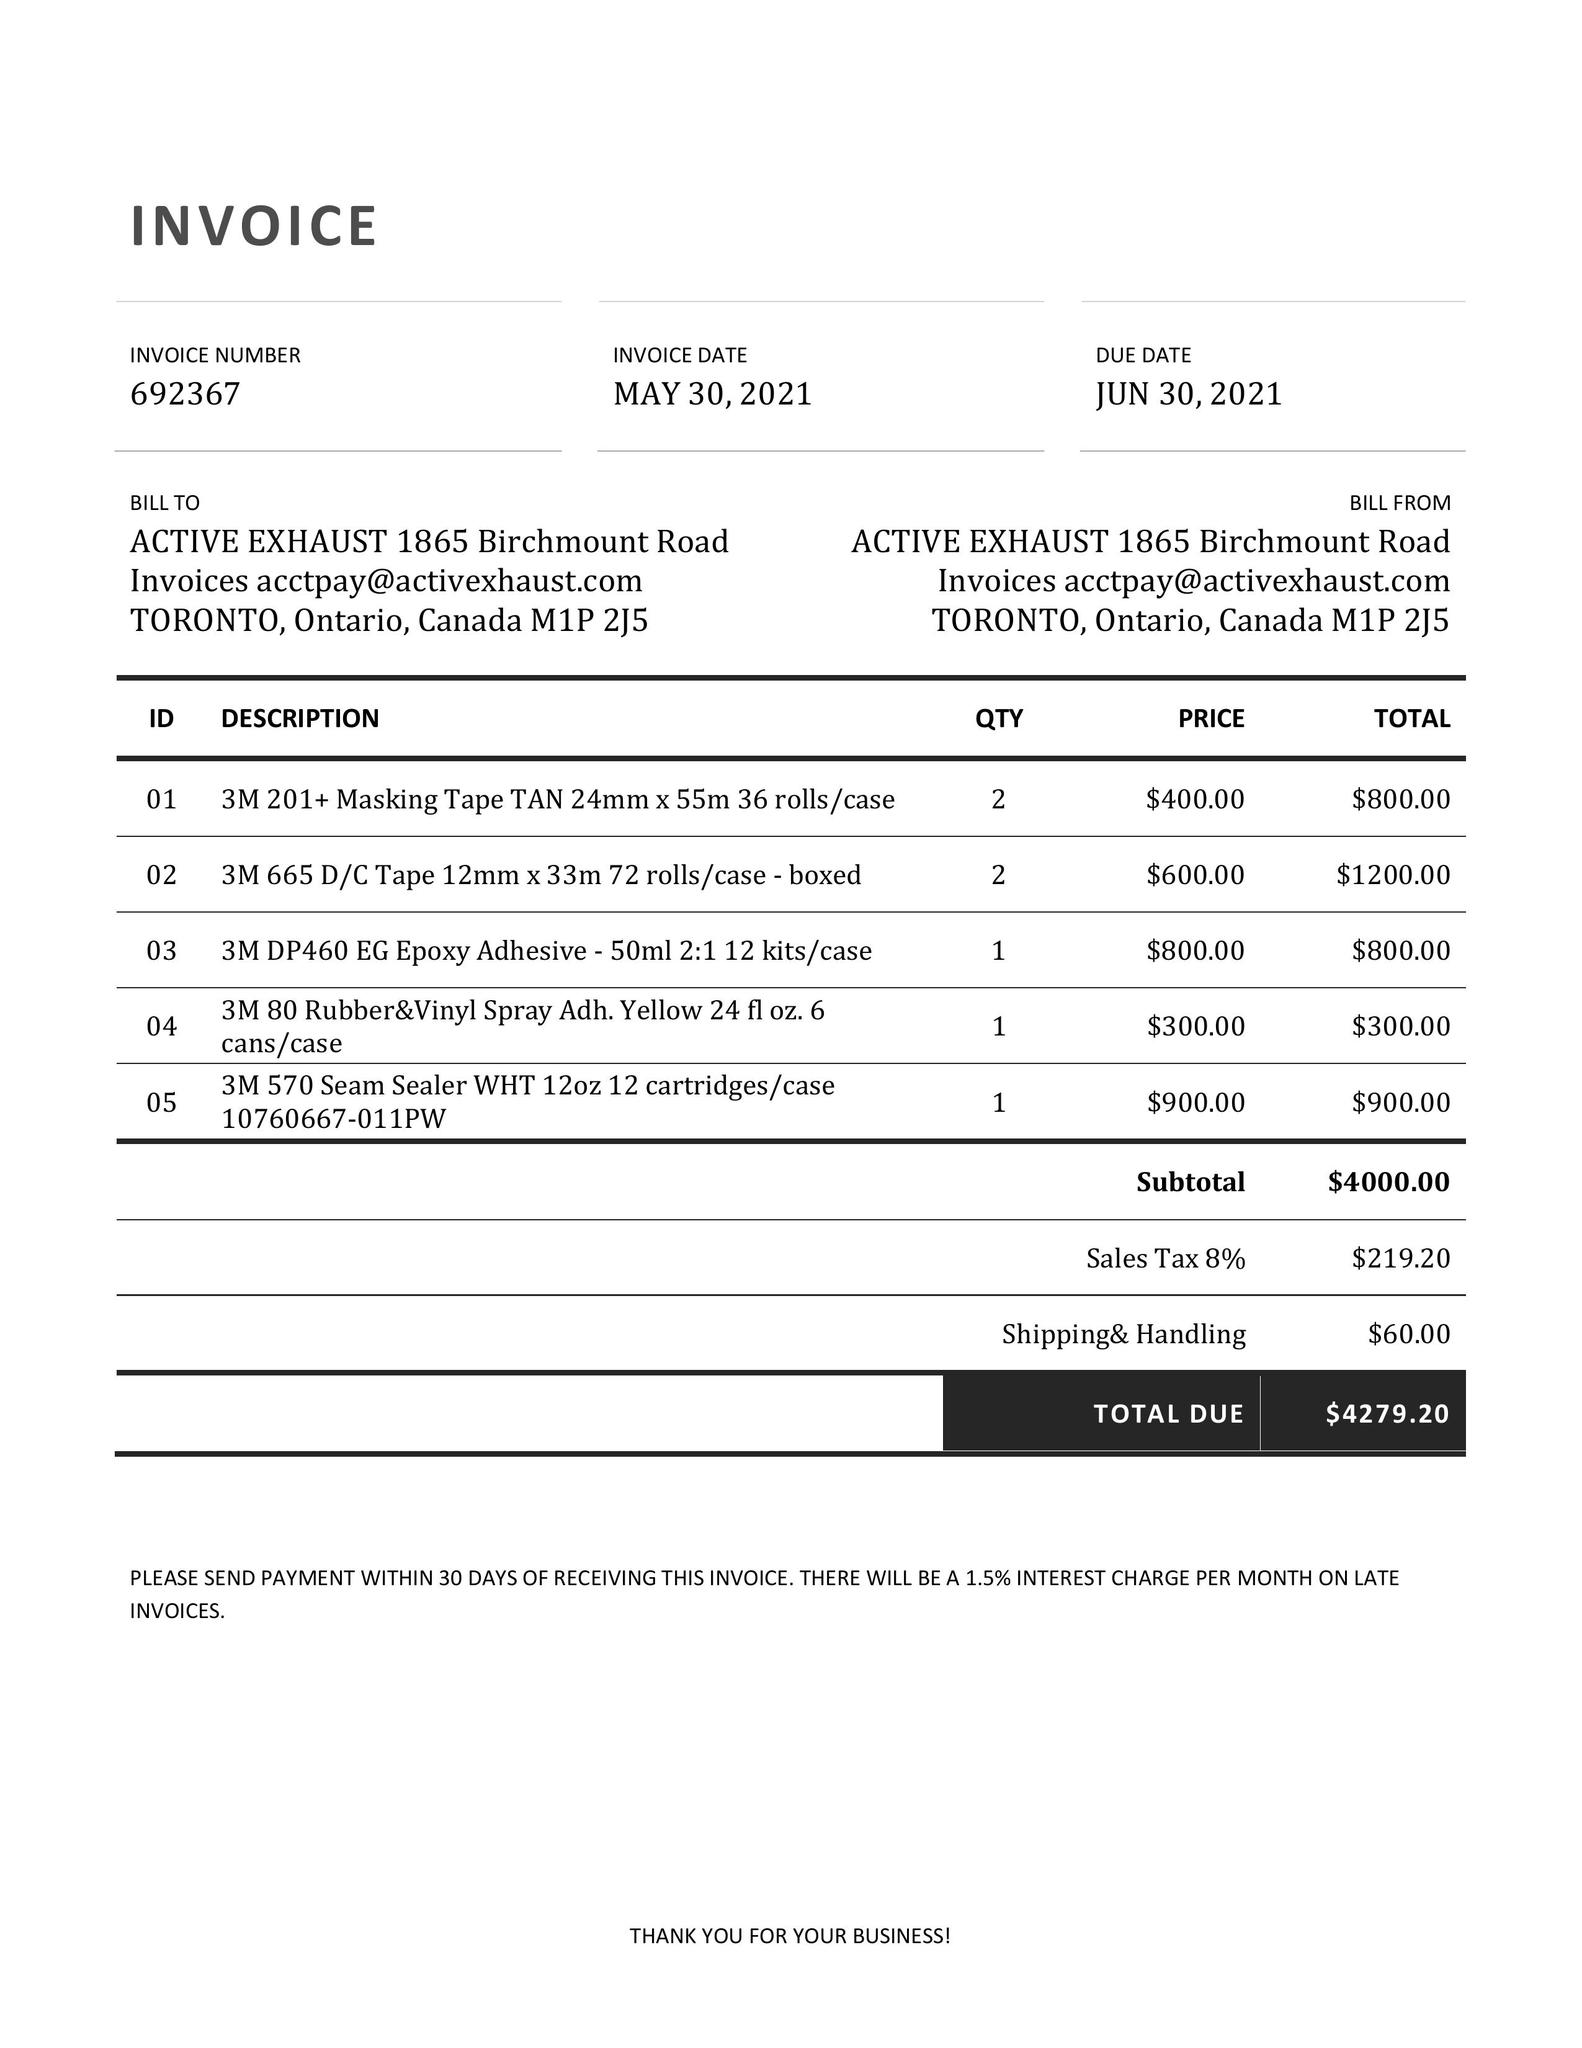

In [28]:
Image.open(df.loc[21]['image_path'])

In [ ]:
ds = load_dataset("Nabin1995/invoice-dataset-layoutlmv3")

In [ ]:
# train, validation, test, dev 모두 합치기 ( 없는것 고려)
def load_and_concatenate_datasets(dataset_):
    datasets = []
    for split in ['train', 'validation', 'test', 'dev']:
        if split in dataset_:
            ds_split = dataset_[split]
            datasets.append(ds_split)
    return concatenate_datasets(datasets)
ds = load_and_concatenate_datasets(ds)

In [ ]:
def display_sample(idx):
    data = ds[idx]
    img = Image.open(io.BytesIO(base64.b64decode(data["image"])))
    img_np = np.array(img)
    annots = data["annotations"]
    
    bboxes = annots['bboxes']        
    ner_tags = annots['ner_tags']
    words = annots['words']
    for bbox, ner_tag, word in zip(bboxes, ner_tags, words):
        if ner_tag != 0:  # Assuming 0 is the background class
            x1, y1, x2, y2 = bbox
            img_np = cv2.rectangle(img_np, (x1, y1), (x2, y2), (255, 0, 0), 2)
            img_np = cv2.putText(img_np, word, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    display(Image.fromarray(img_np))
    

In [ ]:
slider = widgets.IntSlider(min=0, max=len(ds)-1, step=1, value=0)
widgets.interact(display_sample, idx=slider)